In [4]:
import math
import matplotlib.pyplot as plt

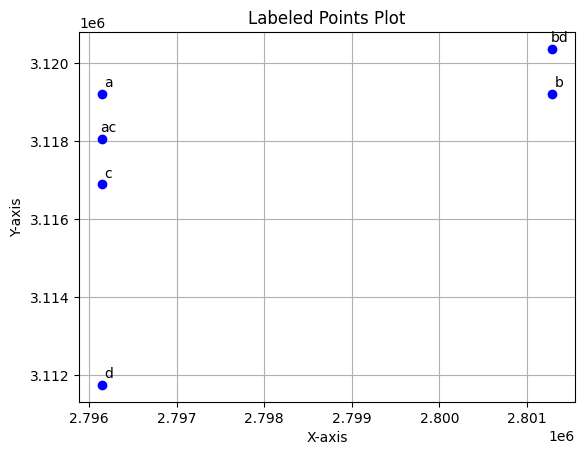

In [5]:
# points right
a = [2796144.9142375817, 3119205.399]  # a
b = [2801289.358, 3119205.399]  # b
c = [2796144.914, 3116890.25]  # c
d = [2796144.91423, 3111745.81222777]  # d
ac = [2796144.91423, 3118047.82788] # ac
bd = [2801289.35868, 3120362.97029] # bd

pnts = [a, b, c, d, ac, bd]
labels = ['a', 'b', 'c', 'd', 'ac', 'bd']

x = [p[0] for p in pnts]
y = [p[1] for p in pnts]

fig = plt.figure(dpi=100)
plt.plot(x, y, 'bo')  # 'bo' for blue color and circle markers

# Add labels to each point
for i, label in enumerate(labels):
    plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(5,5), ha='center')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Labeled Points Plot')
plt.grid(True)

In [31]:
def polygon_signed_area(points: list) -> float:
    n = len(points)
    area = 0
    for i in range(n):
        x1, y1 = points[i]
        x2, y2 = points[(i + 1) % n]
        area += (x1 * y2 - x2 * y1)
    return area / 2.0


def normalize(vector: list):
    mag = math.sqrt(vector[0]**2 + vector[1]**2)
    return [vector[0] / mag, vector[1] / mag]


def generateOuterPoly(points: list, d: float) -> list:
    d = abs(d)
    outerPnts = []
    area = polygon_signed_area(points)

    if area > 0:
        d *= -1

    for i in range(len(points)):
        thisPnt = points[i]
        prevPnt = points[i - 1]
        nextPnt = points[(i + 1) % len(points)]

        prevThis = [thisPnt[0] - prevPnt[0], thisPnt[1] - prevPnt[1]]
        thisNext = [nextPnt[0] - thisPnt[0], nextPnt[1] - thisPnt[1]]

        prevThis_normal_unit = normalize([-prevThis[1], prevThis[0]])
        thisNext_normal_unit = normalize([-thisNext[1], thisNext[0]])

        pointNormal_unit = normalize([prevThis_normal_unit[0] + thisNext_normal_unit[0], prevThis_normal_unit[1] + thisNext_normal_unit[1]])

        pointNormal_scaled = [pointNormal_unit[0] * d, pointNormal_unit[1] * d]

        movedPoint = [thisPnt[0] + pointNormal_scaled[0], thisPnt[1] + pointNormal_scaled[1]]
        outerPnts.append(movedPoint)

    return outerPnts

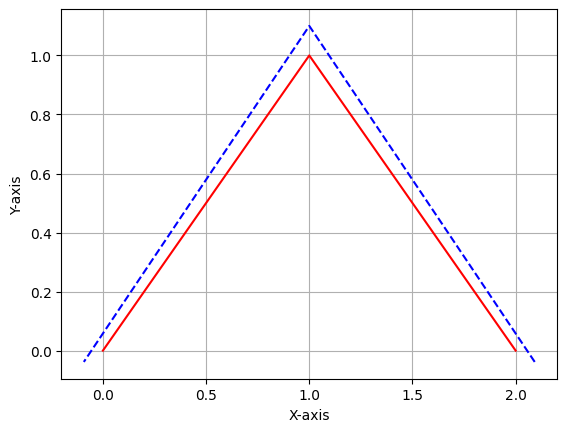

In [33]:
# points right
c = [0, 0]  # a
b = [1,1]  # b
a = [2, 0]  # c

pnts = [a, b, c]
inX = [p[0] for p in pnts]
inY = [p[1] for p in pnts]


outPnts = generateOuterPoly(pnts, 0.1)

outX = [p[0] for p in outPnts]
outY = [p[1] for p in outPnts]

plt.plot(outX, outY, '--b')  # 'bo' for blue color and circle markers
plt.plot(inX, inY, 'r')  # 'bo' for blue color and circle markers

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)